# 11_HuggingFace_QuickStart_pipeline

파이프라인은 추론을 위해 모델을 사용하는 훌륭하고 쉬운 방법입니다. 

이러한 파이프라인은 라이브러리에서 대부분의 복잡한 코드를 추상화하는 개체로, Named Entity Recognition, Masked Language Modeling, 감정 분석, Feature Extraction 및 Question Answering.을 비롯한 여러 task 전용의 간단한 API를 제공합니다.

In [1]:
!pip install -q transformers datasets
!pip install -q sentencepiece
!pip install -q kobert-transformers

     |████████████████████████████████| 3.8 MB 4.3 MB/s 
     |████████████████████████████████| 325 kB 86.7 MB/s 
     |████████████████████████████████| 6.5 MB 55.7 MB/s 
     |████████████████████████████████| 67 kB 6.7 MB/s 
     |████████████████████████████████| 596 kB 89.3 MB/s 
     |████████████████████████████████| 895 kB 57.8 MB/s 
     |████████████████████████████████| 136 kB 94.3 MB/s 
     |████████████████████████████████| 1.1 MB 68.5 MB/s 
     |████████████████████████████████| 212 kB 83.7 MB/s 
     |████████████████████████████████| 127 kB 58.0 MB/s 
     |████████████████████████████████| 271 kB 79.1 MB/s 
     |████████████████████████████████| 94 kB 3.7 MB/s 
     |████████████████████████████████| 144 kB 76.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which i

In [2]:
from transformers import pipeline

🤗 Transformers 라이브러리 기능을 간단히 살펴보겠습니다.  

라이브러리는 **텍스트의 감정 분석과 같은 자연어 이해(NLU)** 및 **새 텍스트로 프롬프트를 완성하거나 다른 언어로 번역하는 것과 같은 자연어 생성(NLG)** 작업을 위해 사전 훈련된 모델을 다운로드합니다.

먼저 pipeline API를 쉽게 활용하여 추론에서 **사전 훈련된 모델**을 빠르게 사용하는 방법을 살펴보겠습니다. 그런 다음, 라이브러리가 어떻게 이러한 모델에 대한 액세스를 제공하고 **데이터를 사전 처리**하는 데 도움이 되는지 확인 할 것입니다.

## pipeline 으로 작업 시작하기

- 주어진 task 에서 사전 훈련된 모델을 사용하는 가장 쉬운 방법은  `pipeline`을 사용하는 것입니다.

🤗 Transformers 라이브러리는 기본적으로 다음 task를 제공합니다.

- **기계 번역(Translation)**: 다른 언어로 된 텍스트를 번역합니다.  
- **감정 분석(Text Classification)**: 텍스트는 긍정적인가 부정적인가?
- **텍스트 생성(Text Generation)**: 프롬프트를 제공하면 모델이 다음을 생성합니다.
- **이름 개체 인식(NER)**: 입력 문장에서 각 단어를 나타내는 개체(사람, 장소, 등.)
- **질문 답변(Question Answering)**: 모델에 일부 컨텍스트와 질문을 제공하고 컨텍스트에서 답변을 추출합니다.
- **마스킹된 텍스트 채우기(Fill-Mask)**: 마스킹된 단어가 있는 텍스트(예: `[MASK]`로 대체)가 주어지면 공백을 채웁니다.
- **요약(Summarization)**: 긴 텍스트의 요약을 생성합니다.
- **특징 추출(Feature Extraction)**: 텍스트의 텐서 표현을 반환합니다.
- **Zero-Shot 분류(Zero-Shot Classification)**


### pretrained models : https://huggingface.co/models <br>
* 위의 링크에서 language 선택하고 korean 클릭 <br>
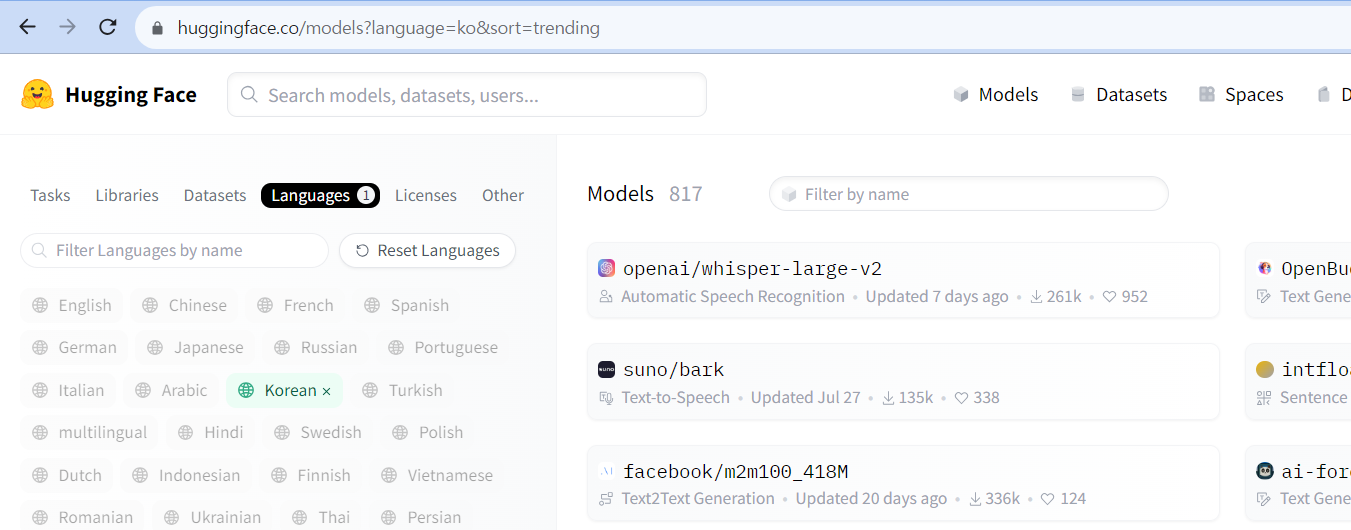

## 기계 번역

- korean pretrained model : https://huggingface.co/Helsinki-NLP/opus-mt-ko-en  

- Helsinki-NLP : University of Helsinki 에서 작성한 다양한 언어 모델 그룹

In [3]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ko-en")

translator("나는 너를 사랑해"), translator("언제나 당신에게 감사함을 느끼고 있습니다.")

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/298M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/822k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

([{'translation_text': 'I love you.'}],
 [{'translation_text': "I'm always grateful to you."}])

## 감정 분석

In [4]:
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

- 이 명령을 처음 입력하면 사전 훈련된 모델과 해당 토크나이저가 다운로드되어 캐시됩니다.  

- 토크나이저는 모델의 텍스트를 사전 처리한 다음 예측을 담당하는 역할을 합니다.  

- 파이프라인은 모든 것을 함께 그룹화하고 예측을 읽을 수 있도록 사후 처리합니다. 예를 들어:

In [5]:
classifier('We are very happy to show you the 🤗 Transformers library.')

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

사전 처리된 다음 모델에 *batch*로 공급하면 다음과 같은 사전 목록을 반환합니다.

In [6]:
results = classifier([
                      "We are very happy to show you the 🤗 Transformers library.",
                       "We hope you don't hate it."
                        ])
for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: POSITIVE, with score: 0.9998
label: NEGATIVE, with score: 0.5309


## 한국어 감정분석

- NSMC(Naver Sentiment Movie Corpus) 로 미세 조정된 BERT 다국어 basecase 모델 : https://huggingface.co/sangrimlee/bert-base-multilingual-cased-nsmc

In [7]:
classifier_ko = pipeline('sentiment-analysis', 
                      model="sangrimlee/bert-base-multilingual-cased-nsmc")

Downloading:   0%|          | 0.00/932 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/679M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/297 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [8]:
print(classifier_ko("오늘은 정말 즐거운 날이다. 행복하다."))
print(classifier_ko("기분이 꿀꿀해서 술이나 한잔 해야겠다."))

[{'label': 'positive', 'score': 0.991436779499054}]
[{'label': 'negative', 'score': 0.882871150970459}]


In [9]:
classifier_ko([
               "언제나 당신에게 감사함을 느끼고 있습니다.", 
               "너한테는 별로 좋은 기억이 없어."
               ])

[{'label': 'positive', 'score': 0.9883792400360107},
 {'label': 'negative', 'score': 0.9782137870788574}]

- 자동 별점 부여

In [10]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
kor_classifier = pipeline('sentiment-analysis', model=model_name)

results = kor_classifier(["다시는 보고 싶지 않은 짜증나는 영화", 
                              "아주 재미있는 영화",
                              "정말 재미없는 영화였다", 
                              "이 영화 망할거야",
                              "이 영화 최고",
                              "보통 영화"])

for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

label: 1 star, with score: 0.297
label: 4 stars, with score: 0.3977
label: 2 stars, with score: 0.3608
label: 1 star, with score: 0.2782
label: 5 stars, with score: 0.8198
label: 3 stars, with score: 0.4462


## Zero Shot Pipeline - 처음 보는 문장의 category 분류

In [11]:
classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformmers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

{'labels': ['education', 'business', 'politics'],
 'scores': [0.8423027396202087, 0.11424146592617035, 0.04345574229955673],
 'sequence': 'This is a course about the Transformmers library'}

## Text 생성

In [13]:
generator = pipeline("text-generation", model="distilgpt2")
generator(
        "In this course, we will teach you how to",
        max_length=30,
        num_return_sequences=2)

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/336M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to build a new software on Python to build a distributed software on Python in your home.\n\n\n'},
 {'generated_text': 'In this course, we will teach you how to understand your language, language, language, and other basic skills before you begin to understand it. Our'}]

### 한글 Text 생성

- SKT 에서 2021년 5월에 만든 `skt/ko-gpt-trinity-1.2B-v0.5` model 사용 (https://huggingface.co/skt/ko-gpt-trinity-1.2B-v0.5) 

In [14]:
generator = pipeline("text-generation", model="skt/ko-gpt-trinity-1.2B-v0.5")
generator(
        "이 학습 과정에서, 제가 가르치고 싶은 것은",
        max_length=30,
        num_return_sequences=1)

Downloading:   0%|          | 0.00/731 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.35G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/109 [00:00<?, ?B/s]

[{'generated_text': "이 학습 과정에서, 제가 가르치고 싶은 것은 '자기주도학습'입니다. 자기주도학습은 학습자가 스스로 학습 목표를 설정하고 학습 계획을 수립하고"}]

In [15]:
generator(
        "스스로 학습 목표를 설정하고 학습 계획을 수립하고",
        max_length=30,
        num_return_sequences=1)

[{'generated_text': '스스로 학습 목표를 설정하고 학습 계획을 수립하고 실천하는 과정을 통해 학습자의 학습 동기를 유발하고 학습자의 학습 의욕을 고취시키는 데 목적이'}]

In [16]:
generator(
        "학습자의 학습 의욕을 고취시키는 데 목적이",
        max_length=30,
        num_return_sequences=1)

[{'generated_text': '학습자의 학습 의욕을 고취시키는 데 목적이 있다. \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n'}]

In [17]:
"이 학습 과정에서, 제가 가르치고 싶은 것은 '자기주도학습'입니다. 자기주도학습은 학습자가" + \
'스스로 학습 목표를 설정하고 학습 계획을 수립하고 실천하는 과정을 통해' + \
'학습자의 학습 의욕을 고취시키는 데 목적이 있다'

"이 학습 과정에서, 제가 가르치고 싶은 것은 '자기주도학습'입니다. 자기주도학습은 학습자가스스로 학습 목표를 설정하고 학습 계획을 수립하고 실천하는 과정을 통해학습자의 학습 의욕을 고취시키는 데 목적이 있다"

### 마스킹된 텍스트 채우기

In [18]:
unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilroberta-base (https://huggingface.co/distilroberta-base)


Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

[{'score': 0.1961979866027832,
  'sequence': 'This course will teach you all about mathematical models.',
  'token': 30412,
  'token_str': ' mathematical'},
 {'score': 0.04052741825580597,
  'sequence': 'This course will teach you all about computational models.',
  'token': 38163,
  'token_str': ' computational'}]

### 개체명 인식

In [19]:
ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvian and I work at Hugging Face in Brooklyn")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/token_classification.py:136: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  f'`grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="{aggregation_strategy}"` instead.'


[{'end': 18,
  'entity_group': 'PER',
  'score': 0.99876773,
  'start': 11,
  'word': 'Sylvian'},
 {'end': 45,
  'entity_group': 'ORG',
  'score': 0.96721965,
  'start': 33,
  'word': 'Hugging Face'},
 {'end': 57,
  'entity_group': 'LOC',
  'score': 0.9846444,
  'start': 49,
  'word': 'Brooklyn'}]

### 질의 응답

In [20]:
question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work ?",
    context = "My name is Sylvian and I work at Hugging Face in Brooklyn"
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

{'answer': 'Hugging Face', 'end': 45, 'score': 0.7309892773628235, 'start': 33}